In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":27.54,"feels_like":27.54,"temp_min":22.78,"temp_max":30.79,"pressure":1028,"humidity":50},"visibility":10000,"wind":{"speed":1.01,"deg":267,"gust":5.99},"clouds":{"all":20},"dt":1641340182,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1641298409,"sunset":1641331474},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 27.54,
  'feels_like': 27.54,
  'temp_min': 22.78,
  'temp_max': 30.79,
  'pressure': 1028,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 267, 'gust': 5.99},
 'clouds': {'all': 20},
 'dt': 1641340182,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641298409,
  'sunset': 1641331474},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 27.54,
  'feels_like': 27.54,
  'temp_min': 22.78,
  'temp_max': 30.79,
  'pressure': 1028,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 267, 'gust': 5.99},
 'clouds': {'all': 20},
 'dt': 1641340182,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641298409,
  'sunset': 1641331474},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 30.79 50 20 1.01


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-04 23:49:42'

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 5 of Set 1 | ucluelet
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | amberley
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | lichinga
Processing Record 12 of Set 1 | halalo
City not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | silvia
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tabou
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | adrar
Processing Record 21 of Set 1 | mendahara
City not found. Skipping...
Processing Record 22 of Set 1 | chapais
Processing Record 23 of Set 

Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | sawai madhopur
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | clarence town
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | makakilo city
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | west bay
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | bodden town
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | sarvar
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | maliq
Processing Record 7 of Set 5 | kieta
Processing Record 8 of Set 5 | ko samui
Processing Record 9 of Set 5 | san jose
Processing Record 10 of Set 5 | puerto escondido
Processing Record 11 of Set 5 | dire
Processing Record 12 of Set 5 | bethel
Processing Record 13 of Set 5 | lakatoro
Processing Record 14 of Set 5

Processing Record 30 of Set 8 | mitsamiouli
Processing Record 31 of Set 8 | glace bay
Processing Record 32 of Set 8 | yuma
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 35 of Set 8 | ballina
Processing Record 36 of Set 8 | cururupu
Processing Record 37 of Set 8 | tevaitoa
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | launceston
Processing Record 40 of Set 8 | ikalamavony
Processing Record 41 of Set 8 | partizanskoye
Processing Record 42 of Set 8 | burica
City not found. Skipping...
Processing Record 43 of Set 8 | opunake
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | labuhan
Processing Record 46 of Set 8 | anjozorobe
Processing Record 47 of Set 8 | maler kotla
Processing Record 48 of Set 8 | ambilobe
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | saquena
Processing Record 1 of Set 9 | suicheng
Process

Processing Record 21 of Set 12 | santa cruz
Processing Record 22 of Set 12 | vitim
Processing Record 23 of Set 12 | quelimane
Processing Record 24 of Set 12 | mtama
Processing Record 25 of Set 12 | mastic beach
Processing Record 26 of Set 12 | irbil
Processing Record 27 of Set 12 | bichura
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | marsa matruh
Processing Record 30 of Set 12 | constitucion
Processing Record 31 of Set 12 | lovrenc na pohorju
Processing Record 32 of Set 12 | port hueneme
Processing Record 33 of Set 12 | pangai
Processing Record 34 of Set 12 | graham
Processing Record 35 of Set 12 | asyut
Processing Record 36 of Set 12 | touros
Processing Record 37 of Set 12 | laiagam
City not found. Skipping...
Processing Record 38 of Set 12 | porto murtinho
Processing Record 39 of Set 12 | teguldet
Processing Record 40 of Set 12 | trincomalee
Processing Record 41 of Set 12 | darab
Processing Record 42 of Set 12 | olafsvik
Processing Record 43 of Set 12 | idan

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,70.74,88,43,3.38,ZA,2022-01-04 23:51:42
1,Bluff,-46.6000,168.3333,55.80,81,98,8.14,NZ,2022-01-04 23:51:42
2,Mataura,-46.1927,168.8643,55.47,97,96,5.32,NZ,2022-01-04 23:51:43
3,Ucluelet,48.9329,-125.5528,38.08,92,99,6.98,CA,2022-01-04 23:51:43
4,Guerrero Negro,27.9769,-114.0611,61.72,66,34,13.53,MX,2022-01-04 23:51:29
5,Punta Arenas,-53.1500,-70.9167,48.31,57,0,14.97,CL,2022-01-04 23:51:44
6,Rawson,-43.3002,-65.1023,61.90,52,6,17.13,AR,2022-01-04 23:50:51
7,Amberley,39.2048,-84.4280,41.05,64,1,3.00,US,2022-01-04 23:51:44
8,Busselton,-33.6500,115.3333,70.05,59,0,14.05,AU,2022-01-04 23:51:44
9,Lichinga,-13.3128,35.2406,62.65,92,100,1.90,MZ,2022-01-04 23:51:45


In [24]:
column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[column_order]

In [26]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-01-04 23:51:42,-33.5906,26.8910,70.74,88,43,3.38
1,Bluff,NZ,2022-01-04 23:51:42,-46.6000,168.3333,55.80,81,98,8.14
2,Mataura,NZ,2022-01-04 23:51:43,-46.1927,168.8643,55.47,97,96,5.32
3,Ucluelet,CA,2022-01-04 23:51:43,48.9329,-125.5528,38.08,92,99,6.98
4,Guerrero Negro,MX,2022-01-04 23:51:29,27.9769,-114.0611,61.72,66,34,13.53
...,...,...,...,...,...,...,...,...,...
574,Aklavik,CA,2022-01-04 23:54:52,68.2191,-135.0107,-21.17,75,20,6.91
575,Jiexiu,CN,2022-01-04 23:54:52,37.0244,111.9125,28.63,52,62,1.34
576,Jiangkou,CN,2022-01-04 23:51:31,25.4872,119.1986,57.09,86,96,3.22
577,Sampit,ID,2022-01-04 23:54:53,-2.5333,112.9500,76.30,92,85,0.56


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

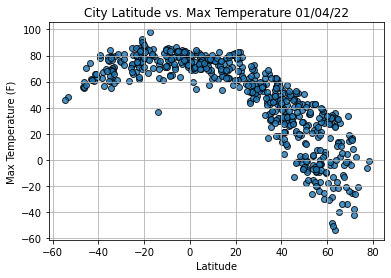

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

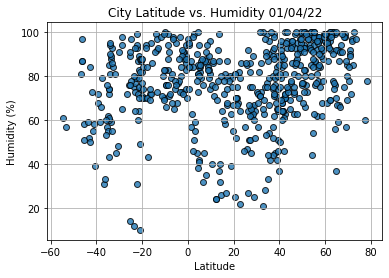

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

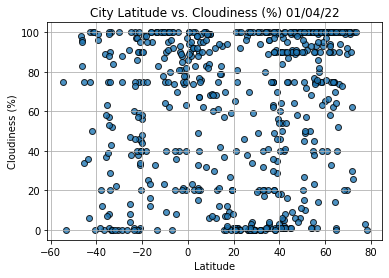

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

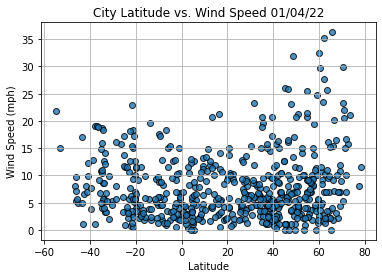

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()